In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 
from scipy import ndimage as nd
from tkinter import Tcl
from poreUtils import *

import skimage
from skimage.measure import label

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [3]:
# Reading the original volume
#scan_path = '1000-1300x1000-1300x2000-2300'
scan_path = 'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\roi\\1000-1300x1000-1300x2000-2300'
tiffs = os.listdir(scan_path)
slices = Tcl().call('lsort', '-dict', tiffs)

In [4]:
vol = np.empty(shape=(300, 300, 300), dtype=np.uint8)
for i, fname in enumerate(slices):
    im = Image.open(os.path.join(scan_path, fname))
    imarray = np.array(im)
    imarray = np.clip(imarray, 0.0005, 0.003)
    imarray = norm8bit(imarray)
    vol[i, :, :] = imarray

In [5]:
vol.shape

(300, 300, 300)

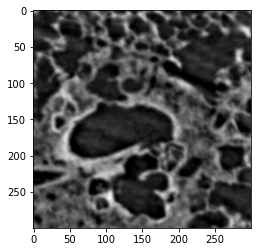

In [42]:
plt.imshow(vol[100, :, :], cmap='gray')

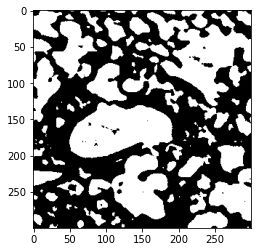

In [43]:
th_vol = vol < 55
#th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
th_vol = th_vol.astype(np.uint8)
plt.imshow(th_vol[100, :, :], cmap='gray')

In [44]:
th_vol = nd.binary_dilation(th_vol, np.ones((5,5,5)))
th_vol = nd.binary_erosion(th_vol, np.ones((5,5,5)))

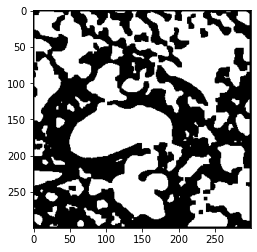

In [45]:
%matplotlib inline
plt.imshow(th_vol[100, :, :], cmap='gray')


In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


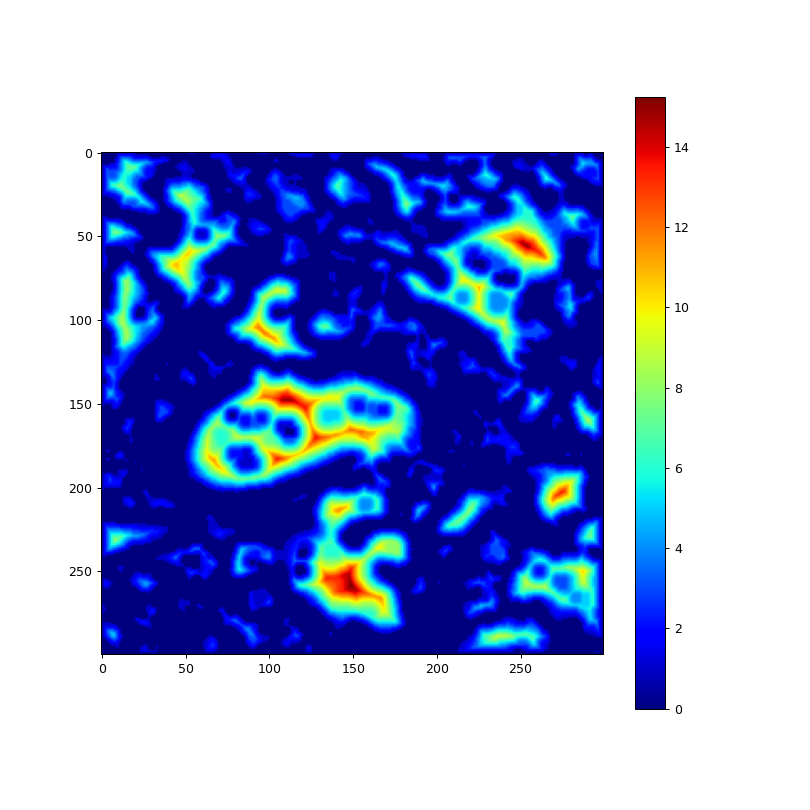

<IPython.core.display.Javascript object>


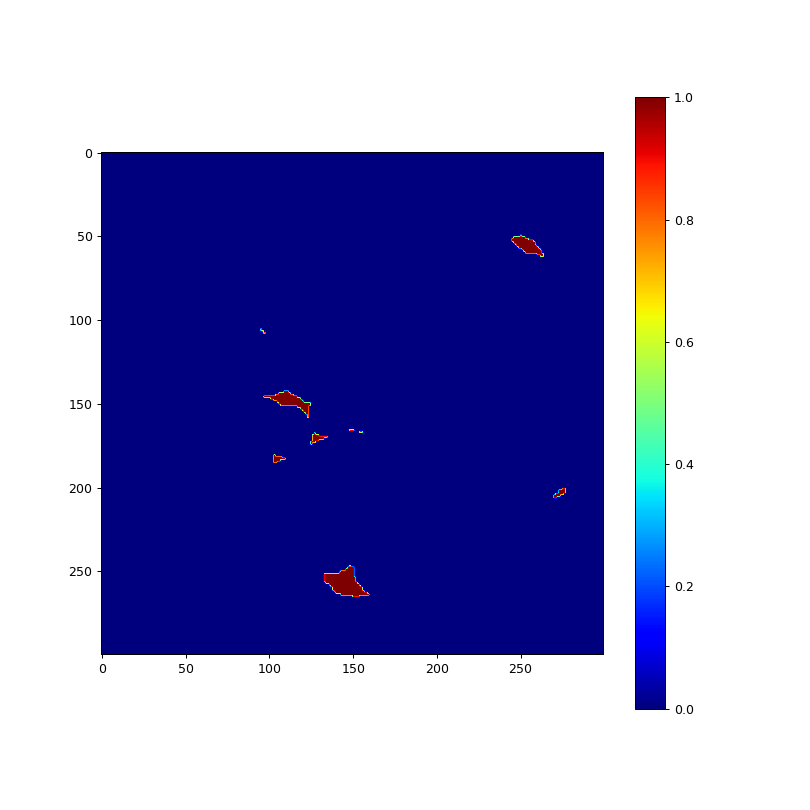

<IPython.core.display.Javascript object>


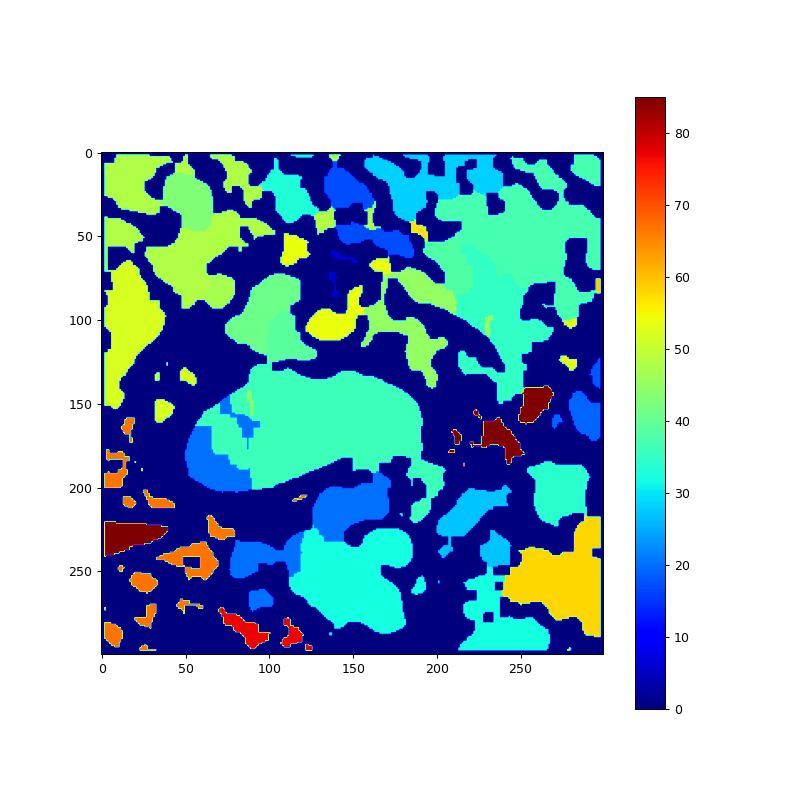

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103]


In [50]:
#dt3d = nd.distance_transform_edt(th_vol)
# coords = peak_local_max(dt, footprint=np.ones((3, 3)), labels=th_img)
# mask = np.zeros(dt.shape, dtype=bool)
# mask[tuple(coords.T)] = True

mask = dt3d > 12
markers = label(mask)
labels = watershed(-dt3d, markers, mask=th_vol)

fig = plt.figure(figsize=(9,9))
plt.imshow(dt3d[100, :, :], cmap='jet')
plt.colorbar()
plt.show()


fig = plt.figure(figsize=(9,9))
plt.imshow(mask[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(9,9))
plt.imshow(labels[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

print(np.unique(labels))


In [16]:
labels.dtype

dtype('int32')